
# Exercise on resource allocation: the 'ERA' model

## Description of the 'ERA' whole-cell coarse-grained model

We consider an extremely simplified representation of a cell:

<img src='ERA-model-scheme.png' width=50%/>

As depicted above, the cell is made of only three coarse-grained molecular components: two types of proteins, $E$ and $R$, and a single species $A$ representing both protein precursors and energy.

* The job of $E$ proteins is to convert external nutrients into protein precursors $A$

* The job of $R$ proteins is to convert protein precursors $A$ into proteins ($E$ or $R$)

* We call $k$ the efficiency of transport and metabolism, i.e. protein precursors $A$ are produced at rate $k E$

* $\sigma$ and $a_{sat}$ are the enzymatic constants for $R$, i.e. the total rate of protein synthesis (which is also the consumption rate of $A$) is $\sigma \frac{a}{a+a_{sat}} R$ where $a = A / V$ is the concentration of protein precursors $A$

* The fractions $f_E$ and $f_R = 1 - f_E$ represent the cell proteome allocation, i.e. how much of total protein synthesis is invested in $E$ and $R$ proteins respectively 

* We assume that the cell maintains a constant mass density, so that the cell volume is always proportional to the cell  mass, which is equal to $E + R + A$ (we assume that $E$, $R$ and $A$ have the same mass). We choose the mass and volume units so that $M = V$. This means that mass fractions and concentrations are equivalent

### Questions

1) What is represented by $R$? What are the generic names for the enzymatic constants $\sigma$ and $a_{sat}$?

2) In your opinion, should $k$ depends on the composition of the media? And on the strain genotype?

3) Write down differential equations representing the temporal evolution of the **amounts** of $A$, $E$ and $R$

4) Find a simple expression for the instantaneous cell growth rate $\alpha = \frac{1}{V} \frac{dV}{dt}$ (think mass conservation and combine the differential equations)

5) **BONUS question - not required to continue**. Write down differential equations representing the temporal evolution of the **concentrations** $a$, $e$ and $r$ of $A$, $E$ and $R$

> The few code cells below (after the questions) allows you to numerically simulate the model, once values for parameters have been chosen. Feel free to play with this code to answer the following questions. 
You can also try to reason from the equations directly...

6) This model seems to always reach a state of steady (or balanced) exponential growth, where all components increase at the same (exponential rate), while the concentrations of components remain constant. To which extent is this steady-state dependent on initial conditions?

7) What growth rate and concentrations do you expect at steady-state for the extreme cases $f_E = 0$ and $f_E = 1$?

8) From now own we will fix $\sigma = 1$ and $a_{sat} = 0.01$. Propose a fixed allocation strategy (i.e. a value for $f_E$) for the three following conditions: $k = 0.25$, $k = 1$ and $k = 2.5$. Your goal is to grow as fast as possible ! We will compare in class the different strategies you propose :)

9) Describe with your words what governs how good a given choice of $f_E$ is.

9) **Open question**. Propose a mathematical function $f_E = f(k)$ representing the best strategy to adopt as a function of $k$. The perfect answer is probably hard to find, so try to find a good enough and simple enough function. We will compare in class different choices.

10) **Open question**. Let's assume that a cell can dynamically regulate or adapt its allocation strategy represented by the value $f_E$. Let's also assume that a cell can only sense **ONE** of the three internal concentration $e$, $r$ and $a$. What would you choose to sense in order to adapt the value of $f_E$? Let's call it $x$. Propose a dynamic regulation function $f_E = f(x)$ that you think is good (i.e., allows you to grow near optimally for a large range of environments, represented by different values of $k$). Don't forget that $f_E = 1 - f_R$, so you can also decide to have $f_R$ being primarily regulated. 

11) **BONUS question**. Adapt the code below to simulate the case where $f_E$ is dynamically regulated as you proposed above.


#### Code example for simulating and plotting the model

In [1]:
import numpy as np # for basic vector computation in python
import scipy.integrate as integrate # needed to solve ODEs
import matplotlib.pyplot as plt # for plotting

In [2]:
params = {'sigma':1, 'k':2.5, 'a_sat':0.01, 'f_E':0.3}

In [3]:
# the function describing the right-hand side of the ODEs
# y[0] = E, y[1] = R, y[2] = A
def derivs(t, y):
    V = sum(y) # cell volume or mass
    E,R,A = y
    a = A/V # concentration of precursors 
    total_prot_synth = R * params['sigma'] * a / (a + params['a_sat']) # rate of total protein synthesis
    dA_dt = params['k'] * E - total_prot_synth # metabolism produce A, protein synthesis consume A
    dE_dt = params['f_E'] * total_prot_synth # fraction of total synthesis allocated to E proteins (metabolism)
    dR_dt = (1-params['f_E']) * total_prot_synth # fraction allocated to R proteins (ribosomes)
    dy_dt = np.array([dE_dt, dR_dt, dA_dt])
    return dy_dt

In [4]:
y0 = np.array([10,10,0]) # initial condition with equal amount of E and R and no A

In [5]:
ode_result = integrate.solve_ivp(derivs, # the RHS for the ODEs
                                 (0,20), # time interval
                                 y0, # initial condition
                                 dense_output=True, 
                                 rtol=1e-6, atol=1e-9)

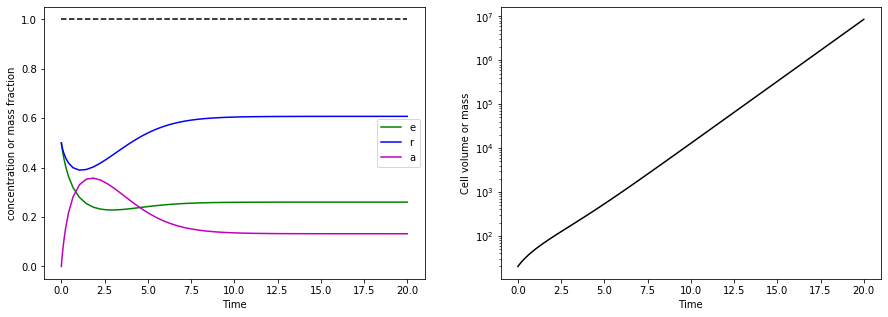

In [6]:
# Plotting the result of the ODE simulation. 
# We verify that the concentrations always sum to 1
E,R,A = ode_result.y
V = E + R + A
e, r, a = E/V, R/V, A/V
t = ode_result.t
f, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
ax1.plot(t, e, 'g', label='e')
ax1.plot(t, r, 'b', label='r')
ax1.plot(t, a, 'm', label='a')
ax1.plot(t, e + r + a, '--k')
ax1.legend()
ax1.set_ylabel('concentration or mass fraction')
ax2.semilogy(t, V, 'k')
ax2.set_ylabel('Cell volume or mass')
for ax in [ax1, ax2]:
    ax.set_xlabel('Time')

In [7]:
growth_rate_1 = np.polyfit(t[-5:], np.log(V[-5:]), 1)[0]
growth_rate_2 = params['k'] * e[-1]
print(f'growth rate measured via mass growth: {growth_rate_1:.4f}, via formula k*e: {growth_rate_2:.4f}')

growth rate measured via mass growth: 0.6508, via formula k*e: 0.6508
